# Exercise 8



In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import statsmodels.api as sm
from scipy.optimize import curve_fit
from matplotlib import cm

In this exercise I have used the simulated annealing to found the ground state of a double well, I tried it on a simple harmonic oscillator too. <br>
The function I want to use to extimate the wafe function follows: $$ \psi(x) = e^{\frac{(x+\mu)^2}{2\sigma^2}} + e^{\frac{(x-\mu)^2}{2\sigma^2}} $$
And I want to find the values of $\sigma$ and $\mu$ that minimize the energy $\left<\psi |H| \psi\right> $.

## <span style="color:green"> Harmonic Oscillator </span>
First I used the simulated annealing to found the ground state of the harmonic oscillator. 

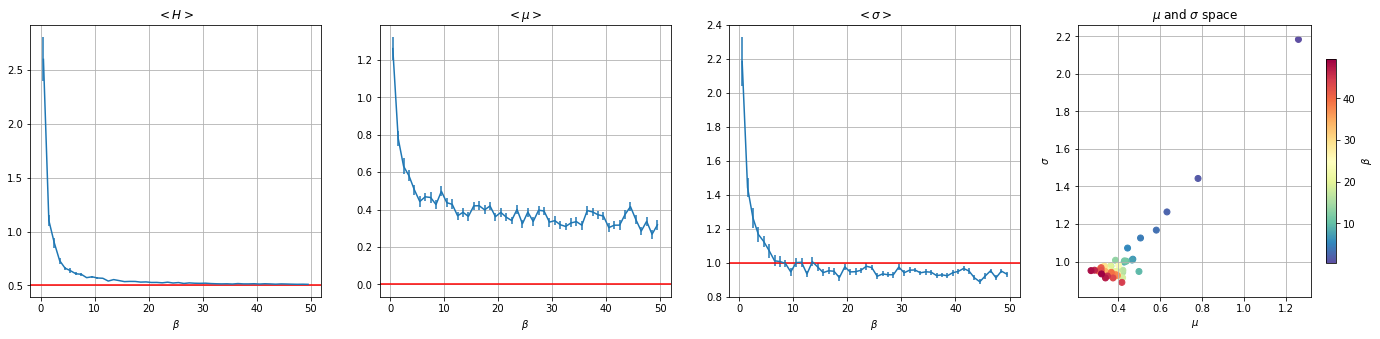

In [48]:
path_I = "8.2/Harmonic_Oscillator/I.out"
path_s = "8.2/Harmonic_Oscillator/s.out"
path_m = "8.2/Harmonic_Oscillator/m.out"

beta, I, I_err= np.loadtxt( path_I, usecols=(0,1,2), unpack=True)
beta, m, m_err= np.loadtxt( path_m, usecols=(0,1,2), unpack=True)
beta, s, s_err= np.loadtxt( path_s, usecols=(0,1,2), unpack=True)

fig, (plot_I, plot_m, plot_s, plot_ms) = plt.subplots(1, 4, figsize=(24,5))

plot_I.errorbar(beta,I,yerr=I_err)
plot_I.grid(True)
plot_I.axhline(0.5,color="r")
plot_I.set_title("$<H>$")
plot_I.set_xlabel("$\\beta$")

plot_m.errorbar(beta,m,yerr=m_err)
plot_m.grid(True)
plot_m.axhline(0,color="r")
plot_m.set_title("$<\mu>$")
plot_m.set_xlabel("$\\beta$")

plot_s.errorbar(beta,s,yerr=s_err)
plot_s.grid(True)
plot_s.axhline(1,color="r")
plot_s.set_title("$<\sigma>$")
plot_s.set_xlabel("$\\beta$")

plt.scatter(m,s,c=beta,cmap="Spectral_r")
plt.colorbar(label="$\\beta$",orientation="vertical",shrink=0.75)
plot_ms.set_xlabel("$\mu$")
plot_ms.set_ylabel("$\sigma$")
plot_ms.set_title("$\mu$ and $\sigma$ space")
plot_ms.grid(True)

min_index = np.argmin(I)

mu=m[min_index]
sigma=s[min_index]


plt.show()

The graphs show that $\sigma$ and $\mu$ doesn't arrive at the true value of the known eigenfunction ( $\mu_{true}=0, \sigma_{true}=1$) but are slightly different ( $\mu_{found}=0.318725, \sigma_{found}=0.933903$), <br>
Despite the wrong value of the variables, the extimation of the energy goes to the true value of 0.5 ( $H_{found} = 0.510191$). <br>
The graph of the $\mu$ and $\sigma$ space shows how the values fall in a restricted volume inscreasing $\beta$.

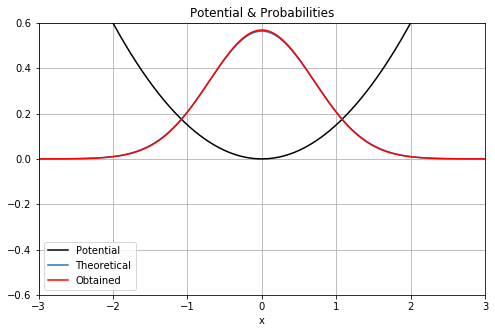

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    #return (x**2 - 2.5)*x**2
    return 0.5*x**2
    
def Psi(x,mu,sigma):
    return np.exp( -(x+mu)**2/(2*sigma**2)) + np.exp( -(x-mu)**2/(2*sigma**2))

norm = 2*np.sqrt(3.14)*sigma*(1+np.exp(-(mu/sigma)**2))
                              
hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2,label="Theoretical")
plt.plot(x,1/norm*(Psi(x,mu,sigma))**2, color ="r", label="Obtained")
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.legend()
plt.ylim((-0.6,0.6))

plt.show()

Despite the wrong $\mu$ and $\sigma$ the function obtained (red one) overlapp almost perfectly the theoretical one.

## <span style="color:green"> Double Well </span>

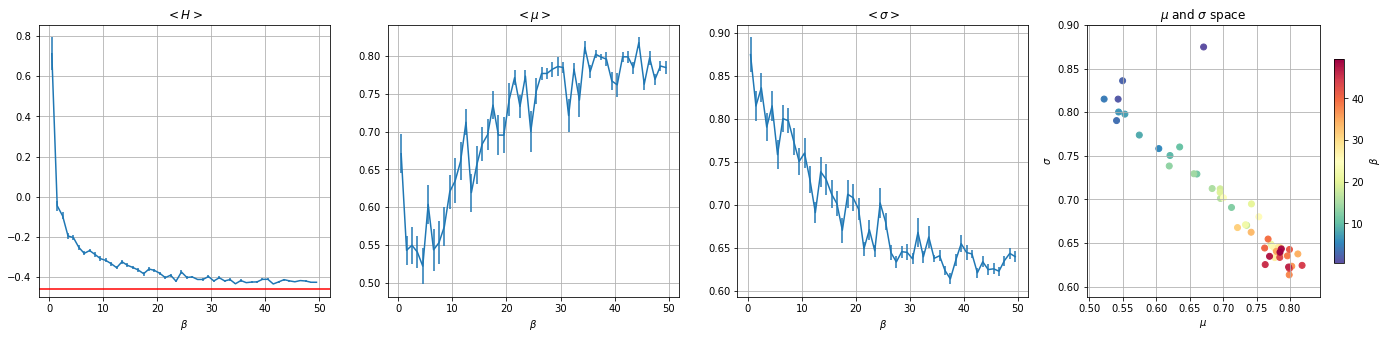

In [25]:
path_I = "8.2/Double_HO/I.out"
path_s = "8.2/Double_HO/s.out"
path_m = "8.2/Double_HO/m.out"

beta, I, I_err= np.loadtxt( path_I, usecols=(0,1,2), unpack=True)
beta, m, m_err= np.loadtxt( path_m, usecols=(0,1,2), unpack=True)
beta, s, s_err= np.loadtxt( path_s, usecols=(0,1,2), unpack=True)

fig, (plot_I, plot_m, plot_s, plot_ms) = plt.subplots(1, 4, figsize=(24,5))

plot_I.errorbar(beta,I,yerr=I_err)
plot_I.grid(True)
plot_I.set_title("$<H>$")
plot_I.set_xlabel("$\\beta$")
plot_I.axhline(-0.46046587969271535,color="r")

plot_m.errorbar(beta,m,yerr=m_err)
plot_m.grid(True)
plot_m.set_title("$<\mu>$")
plot_m.set_xlabel("$\\beta$")

plot_s.errorbar(beta,s,yerr=s_err)

plot_s.grid(True)
plot_s.set_title("$<\sigma>$")
plot_s.set_xlabel("$\\beta$")

plt.scatter(m,s,c=beta,cmap="Spectral_r")
plt.colorbar(label="$\\beta$",orientation="vertical",shrink=0.75)
plot_ms.set_xlabel("$\mu$")
plot_ms.set_ylabel("$\sigma$")
plot_ms.set_title("$\mu$ and $\sigma$ space")
plot_ms.grid(True)

min_index = np.argmin(I)

mu=m[min_index]
sigma=s[min_index]

plt.show()

As in the harmonic oscillator the values of $\sigma$, $\mu$ goes to the values that minimize H.

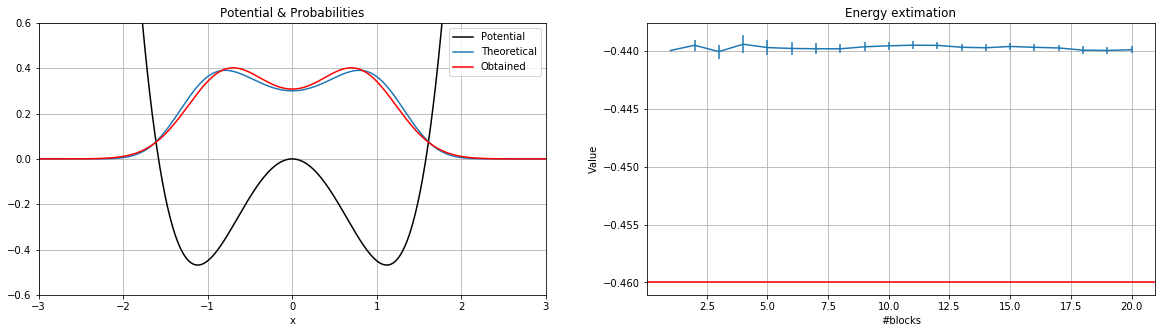

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2
    
def Psi(x,mu,sigma):
    return np.exp( -(x+mu)**2/(2*sigma**2)) + np.exp( -(x-mu)**2/(2*sigma**2))

norm = 2*np.sqrt(3.14)*sigma*(1+np.exp(-(mu/sigma)**2))

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

# Plot a few things
fig, (plot, int_plot) = plt.subplots(1,2,figsize=(20,5))


scale = 0.3
plot.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plot.plot(x,(psi[0])**2,label="Theoretical")
plot.plot(x,1/norm*(Psi(x,mu,sigma))**2, color ="r", label="Obtained")
plot.set_title("Potential & Probabilities")
plot.set_xlabel("x")
plot.grid(True)
plot.set_xlim((-3,3))
plot.legend()
plot.set_ylim((-0.6,0.6))

path = "8.1/integral.out"

n_block, I, I_err = np.loadtxt(path, usecols=(0,1,2), unpack=True)

int_plot.errorbar(n_block, I, yerr=I_err)
int_plot.axhline(-0.46, color="r")
int_plot.set_title("Energy extimation")
int_plot.set_xlabel("#blocks")
int_plot.set_ylabel("Value")
int_plot.grid(True)


plt.show()

The obtained groud state is slightly different from the theoretical one and also his energy is a bit higher. The simulated annealing could found a local minimum but not the absolute one.